In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df=pd.read_csv('final2014-2024.csv')
df.head()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.shape

(7600, 17)

In [3]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,Burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,Leicester City,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,Everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,Swansea City,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,Manchester City,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN


In [4]:
# win-1
# lose/draw=0

def assign_code(x):
    if x=="W":
        return 1
    else:
        return 0
df['FT']=df['Result'].apply(assign_code)
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA,FT
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,Burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,Leicester City,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,Everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,Swansea City,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,Manchester City,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0


In [5]:
df['venue_code']=df['Venue'].astype('category').cat.codes
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA,FT,venue_code
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,Burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,Leicester City,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,Everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,Swansea City,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,Manchester City,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0


In [6]:
# team name encoding
# first make both opponent and team same
df['Opponent'].value_counts()

Opponent
Manchester City    380
Everton            380
Chelsea            380
West Ham           380
Crystal Palace     380
Arsenal            380
Manchester Utd     380
Liverpool          380
Tottenham          380
Leicester City     342
Southampton        342
Newcastle Utd      342
Burnley            304
Aston Villa        266
Brighton           266
Bournemouth        266
Wolves             228
Watford            228
West Brom          190
Swansea City       152
Fulham             152
Stoke City         152
Brentford          114
Leeds United       114
Sunderland         114
Norwich City       114
Sheffield Utd      114
Hull City           76
Nott'ham Forest     76
Huddersfield        76
QPR                 38
Middlesbrough       38
Cardiff City        38
Luton Town          38
Name: count, dtype: int64

In [7]:
df['team'].value_counts()

team
chelsea            380
manchester city    380
arsenal            380
manchester utd     380
tottenham          380
liverpool          380
crystal palace     380
everton            380
west ham           380
southampton        342
leicester city     342
newcastle utd      342
burnley            304
aston villa        266
bournemouth        266
brighton           266
watford            228
wolves             228
west brom          190
fulham             152
swansea city       152
stoke city         152
brentford          114
sunderland         114
norwich city       114
sheffield utd      114
leeds united       114
hull city           76
huddersfield        76
nott'ham forest     76
middlesbrough       38
qpr                 38
cardiff city        38
luton town          38
Name: count, dtype: int64

In [8]:

df['Opponent']=df['Opponent'].apply(lambda x : x.lower())
df['team']=df['team'].apply(lambda x : x.lower())

df.head()



,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA,FT,venue_code
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,leicester city,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,swansea city,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,manchester city,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0


In [9]:
a=df['team'].unique().tolist()
a.sort()
print(a)

['arsenal', 'aston villa', 'bournemouth', 'brentford', 'brighton', 'burnley', 'cardiff city', 'chelsea', 'crystal palace', 'everton', 'fulham', 'huddersfield', 'hull city', 'leeds united', 'leicester city', 'liverpool', 'luton town', 'manchester city', 'manchester utd', 'middlesbrough', 'newcastle utd', 'norwich city', "nott'ham forest", 'qpr', 'sheffield utd', 'southampton', 'stoke city', 'sunderland', 'swansea city', 'tottenham', 'watford', 'west brom', 'west ham', 'wolves']


In [10]:
b=df['Opponent'].unique().tolist()
b.sort()
print(b)

['arsenal', 'aston villa', 'bournemouth', 'brentford', 'brighton', 'burnley', 'cardiff city', 'chelsea', 'crystal palace', 'everton', 'fulham', 'huddersfield', 'hull city', 'leeds united', 'leicester city', 'liverpool', 'luton town', 'manchester city', 'manchester utd', 'middlesbrough', 'newcastle utd', 'norwich city', "nott'ham forest", 'qpr', 'sheffield utd', 'southampton', 'stoke city', 'sunderland', 'swansea city', 'tottenham', 'watford', 'west brom', 'west ham', 'wolves']


In [11]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA,FT,venue_code
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,leicester city,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,swansea city,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,manchester city,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0


In [12]:
# for match week 

df['match_week']=df['Round'].apply(lambda x: x.split(" ")[1]).astype(int)

In [13]:
df

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA,FT,venue_code,match_week
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0,1
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,leicester city,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1,2
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0,3
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,swansea city,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1,4
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,manchester city,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,2024-04-24,20,Matchweek 29,Wed,Away,L,2,4,manchester utd,29,73549.0,Oliver Arblaster,3-5-2,Michael Salisbury,sheffield utd,0.8,2.9,0,0,29
7596,2024-04-27,15,Matchweek 35,Sat,Away,L,1,5,newcastle utd,40,52196.0,Oliver Arblaster,3-5-2,Tony Harrington,sheffield utd,1.5,3.1,0,0,35
7597,2024-05-04,15,Matchweek 36,Sat,Home,L,1,3,nott'ham forest,54,28516.0,Jack Robinson,3-5-2,Chris Kavanagh,sheffield utd,2.2,1.5,0,1,36
7598,2024-05-11,15,Matchweek 37,Sat,Away,L,0,1,everton,42,39221.0,Jack Robinson,3-5-2,Stuart Attwell,sheffield utd,0.6,2.3,0,0,37


In [14]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Referee,team,xG,xGA,FT,venue_code,match_week
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,burnley,61,20699.0,NaN,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0,1
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,leicester city,63,41604.0,NaN,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1,2
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,everton,39,39402.0,NaN,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0,3
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,swansea city,55,41400.0,NaN,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1,4
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,manchester city,42,45602.0,NaN,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0,5


In [15]:
df['match_week']

0        1
1        2
2        3
3        4
4        5
        ..
7595    29
7596    35
7597    36
7598    37
7599    38
Name: match_week, Length: 7600, dtype: int64

In [16]:
df['Formation'].unique()

array(['4-2-3-1', '4-4-2', '4-4-1-1', '4-1-4-1', '4-3-3', '3-4-1-2',
       '4-1-2-1-2◆', '3-1-4-2', '3-5-1-1', '3-4-3', '5-4-1', '5-3-2',
       '4-3-1-2', '4-3-2-1', '4-5-1', '4-1-3-2', '3-5-2', '4-2-2-2',
       '4-2-4-0', '3-4-3◆', '3-3-3-1', '3-2-4-1'], dtype=object)

In [17]:
df['Formation']=df['Formation'].apply(lambda x : x.replace("◆", ""))
df['Formation'].unique()

array(['4-2-3-1', '4-4-2', '4-4-1-1', '4-1-4-1', '4-3-3', '3-4-1-2',
       '4-1-2-1-2', '3-1-4-2', '3-5-1-1', '3-4-3', '5-4-1', '5-3-2',
       '4-3-1-2', '4-3-2-1', '4-5-1', '4-1-3-2', '3-5-2', '4-2-2-2',
       '4-2-4-0', '3-3-3-1', '3-2-4-1'], dtype=object)

#### formation one hot encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder
import joblib
# Approach : One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False)
formation_reshaped = df['Formation'].values.reshape(-1, 1)
ohe.fit(formation_reshaped)

# saving encoder for future
joblib.dump(ohe, 'formation_ohe.pkl')

formation_ohe = ohe.transform(formation_reshaped)
print(formation_ohe[0],formation_ohe[2])
# print(type(formation_ohe))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# load encoder
test_encoder=joblib.load('formation_ohe.pkl')
test_encoder.transform([['4-3-3']])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0.]])

#### team, opponent name label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
# Fit and transform the 'team' column
df['opponent_encoded'] = label_encoder.fit_transform(df['Opponent'])

# Save the encoder
joblib.dump(label_encoder, 'team_label_encoder.pkl')

# based pn this transform 
df['team_encoded']=label_encoder.transform(df['team'])


#### check the encoder

In [21]:
df[df['team']=='aston villa'].head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,...,Formation,Referee,team,xG,xGA,FT,venue_code,match_week,opponent_encoded,team_encoded
608,2014-08-16,15,Matchweek 1,Sat,Away,W,1,0,stoke city,37,...,4-2-3-1,Anthony Taylor,aston villa,NaN,NaN,1,0,1,26,1
609,2014-08-23,12,Matchweek 2,Sat,Home,D,0,0,newcastle utd,40,...,4-3-3,Mike Dean,aston villa,NaN,NaN,0,1,2,20,1
610,2014-08-31,13,Matchweek 3,Sun,Home,W,2,1,hull city,45,...,4-4-2,Mark Clattenburg,aston villa,NaN,NaN,1,1,3,12,1
611,2014-09-13,17,Matchweek 4,Sat,Away,W,1,0,liverpool,25,...,4-3-3,Lee Mason,aston villa,NaN,NaN,1,0,4,15,1
612,2014-09-20,15,Matchweek 5,Sat,Home,L,0,3,arsenal,29,...,4-5-1,Mike Jones,aston villa,NaN,NaN,0,1,5,0,1


In [22]:
df[df['Opponent']=='aston villa'].head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,...,Formation,Referee,team,xG,xGA,FT,venue_code,match_week,opponent_encoded,team_encoded
5,2014-09-27,15,Matchweek 6,Sat,Home,W,3,0,aston villa,63,...,4-2-3-1,Philip Dowd,chelsea,NaN,NaN,1,1,6,1,7
23,2015-02-07,15,Matchweek 24,Sat,Away,W,2,1,aston villa,49,...,4-2-3-1,Niel Swarbrick,chelsea,NaN,NaN,1,0,24,1,7
44,2014-10-04,17,Matchweek 7,Sat,Away,W,2,0,aston villa,68,...,4-4-2,Chris Foy,manchester city,NaN,NaN,1,0,7,1,17
71,2015-04-25,17,Matchweek 34,Sat,Home,W,3,2,aston villa,45,...,4-2-3-1,Mike Dean,manchester city,NaN,NaN,1,1,34,1,17
80,2014-09-20,15,Matchweek 5,Sat,Away,W,3,0,aston villa,71,...,4-2-3-1,Mike Jones,arsenal,NaN,NaN,1,0,5,1,0


#### null values


In [23]:
df.isna().sum()

Date                   0
Time                   0
Round                  0
Day                    0
Venue                  0
Result                 0
GF                     0
GA                     0
Opponent               0
Poss                   0
Attendance           882
Captain              760
Formation              0
Referee                0
team                   0
xG                  2280
xGA                 2280
FT                     0
venue_code             0
match_week             0
opponent_encoded       0
team_encoded           0
dtype: int64

In [24]:
# Find rows with any null values ,only attendence col is we need
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,...,Formation,Referee,team,xG,xGA,FT,venue_code,match_week,opponent_encoded,team_encoded
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,burnley,61,...,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0,1,5,7
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,leicester city,63,...,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1,2,14,7
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,everton,39,...,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0,3,9,7
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,swansea city,55,...,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1,4,28,7
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,manchester city,42,...,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0,5,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,2021-05-02,19,Matchweek 34,Sun,Away,L,0,4,tottenham,34,...,3-4-1-2,Andre Marriner,sheffield utd,0.5,2.2,0,0,34,29,24
5316,2021-05-08,15,Matchweek 35,Sat,Home,L,0,2,crystal palace,50,...,3-5-2,Simon Hooper,sheffield utd,0.7,2.0,0,1,35,8,24
5317,2021-05-16,19,Matchweek 36,Sun,Away,W,1,0,everton,38,...,3-4-3,Jonathan Moss,sheffield utd,1.2,1.4,1,0,36,9,24
6307,2023-05-28,16,Matchweek 38,Sun,Away,L,1,2,aston villa,59,...,4-4-2,David Coote,brighton,1.4,2.8,0,0,38,1,4


In [25]:
a=df[(df['Opponent']=='brighton') & (df['team']=='aston villa')]
a


,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,...,Formation,Referee,team,xG,xGA,FT,venue_code,match_week,opponent_encoded,team_encoded
4416,2019-10-19,15,Matchweek 9,Sat,Home,W,2,1,brighton,49,...,4-3-3,David Coote,aston villa,3.0,1.2,1,1,9,4,1
4430,2020-01-18,15,Matchweek 23,Sat,Away,D,1,1,brighton,45,...,3-4-3,Andy Madley,aston villa,0.6,1.1,0,0,23,4,1
4947,2020-11-21,15,Matchweek 9,Sat,Home,L,1,2,brighton,56,...,4-2-3-1,Michael Oliver,aston villa,1.5,1.4,0,1,9,4,1
4961,2021-02-13,20,Matchweek 24,Sat,Away,D,0,0,brighton,42,...,4-2-3-1,Darren England,aston villa,0.1,2.2,0,0,24,4,1
5825,2021-11-20,15,Matchweek 12,Sat,Home,W,2,0,brighton,38,...,4-3-3,Anthony Taylor,aston villa,0.7,0.4,1,1,12,4,1
5838,2022-02-26,15,Matchweek 27,Sat,Away,W,2,0,brighton,34,...,4-1-2-1-2,John Brooks,aston villa,1.0,0.7,1,0,27,4,1
6322,2022-11-13,14,Matchweek 16,Sun,Away,W,2,1,brighton,35,...,4-4-2,Chris Kavanagh,aston villa,1.5,0.6,1,0,16,4,1
6345,2023-05-28,16,Matchweek 38,Sun,Home,W,2,1,brighton,41,...,4-2-3-1,David Coote,aston villa,2.8,1.4,1,1,38,4,1
6960,2023-09-30,12,Matchweek 7,Sat,Home,W,6,1,brighton,39,...,4-2-3-1,Andy Madley,aston villa,1.6,1.7,1,1,7,4,1
6989,2024-05-05,14,Matchweek 36,Sun,Away,L,0,1,brighton,48,...,4-2-3-1,Robert Jones,aston villa,0.1,2.5,0,0,36,4,1


In [26]:
# Group by 'team' and calculate the rolling mean of 'Score'
df['Rolling_Mean'] = df.groupby('team')['Attendance'].transform(lambda x: x.expanding().mean())


df['Rolling_Mean'] = df['Rolling_Mean']

# Fill null values in 'attendence' with the calculated rolling mean
df['Attendance'] = df['Attendance'].fillna(df['Rolling_Mean'])

# If there are still NaN values, use forward fill and backward fill
df['Attendance'] = df['Attendance'].ffill().bfill()

# Drop the temporary 'Rolling_Mean' column
df = df.drop(columns=['Rolling_Mean'])

df.isna().sum()

Date                   0
Time                   0
Round                  0
Day                    0
Venue                  0
Result                 0
GF                     0
GA                     0
Opponent               0
Poss                   0
Attendance             0
Captain              760
Formation              0
Referee                0
team                   0
xG                  2280
xGA                 2280
FT                     0
venue_code             0
match_week             0
opponent_encoded       0
team_encoded           0
dtype: int64

In [27]:
print(df[df['Attendance'].isna()]['Attendance'])

Series([], Name: Attendance, dtype: float64)


In [28]:
c=df[(df['Opponent']=='aston villa') & (df['team']=='brighton')]
c

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,...,Formation,Referee,team,xG,xGA,FT,venue_code,match_week,opponent_encoded,team_encoded
4340,2019-10-19,15,Matchweek 9,Sat,Away,L,1,2,aston villa,51,...,4-4-2,David Coote,brighton,1.2,3.0,0,0,9,1,4
4354,2020-01-18,15,Matchweek 23,Sat,Home,D,1,1,aston villa,55,...,4-4-2,Andy Madley,brighton,1.1,0.6,0,1,23,1,4
5138,2020-11-21,15,Matchweek 9,Sat,Away,W,2,1,aston villa,44,...,3-4-1-2,Michael Oliver,brighton,1.4,1.5,1,0,9,1,4
5153,2021-02-13,20,Matchweek 24,Sat,Home,D,0,0,aston villa,58,...,4-1-3-2,Darren England,brighton,2.2,0.1,0,1,24,1,4
5635,2021-11-20,15,Matchweek 12,Sat,Away,L,0,2,aston villa,62,...,3-5-2,Anthony Taylor,brighton,0.4,0.7,0,0,12,1,4
5649,2022-02-26,15,Matchweek 27,Sat,Home,L,0,2,aston villa,66,...,3-5-2,John Brooks,brighton,0.7,1.0,0,1,27,1,4
6283,2022-11-13,14,Matchweek 16,Sun,Home,L,1,2,aston villa,65,...,4-2-3-1,Chris Kavanagh,brighton,0.6,1.5,0,1,16,1,4
6307,2023-05-28,16,Matchweek 38,Sun,Away,L,1,2,aston villa,59,...,4-4-2,David Coote,brighton,1.4,2.8,0,0,38,1,4
7226,2023-09-30,12,Matchweek 7,Sat,Away,L,1,6,aston villa,61,...,4-2-3-1,Andy Madley,brighton,1.7,1.6,0,0,7,1,4
7254,2024-05-05,14,Matchweek 36,Sun,Home,W,1,0,aston villa,52,...,4-2-3-1,Robert Jones,brighton,2.5,0.1,1,1,36,1,4


In [29]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,Poss,...,Formation,Referee,team,xG,xGA,FT,venue_code,match_week,opponent_encoded,team_encoded
0,2014-08-18,20,Matchweek 1,Mon,Away,W,3,1,burnley,61,...,4-2-3-1,Michael Oliver,chelsea,NaN,NaN,1,0,1,5,7
1,2014-08-23,15,Matchweek 2,Sat,Home,W,2,0,leicester city,63,...,4-2-3-1,Lee Mason,chelsea,NaN,NaN,1,1,2,14,7
2,2014-08-30,17,Matchweek 3,Sat,Away,W,6,3,everton,39,...,4-2-3-1,Jonathan Moss,chelsea,NaN,NaN,1,0,3,9,7
3,2014-09-13,15,Matchweek 4,Sat,Home,W,4,2,swansea city,55,...,4-2-3-1,Kevin Friend,chelsea,NaN,NaN,1,1,4,28,7
4,2014-09-21,16,Matchweek 5,Sun,Away,D,1,1,manchester city,42,...,4-2-3-1,Mike Dean,chelsea,NaN,NaN,0,0,5,17,7


## model making

In [30]:

predictors=['Time','venue_code','match_week','Attendance','opponent_encoded','team_encoded']
formation_ohe  #also a predictor but in np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
# Convert numpy array to DataFrame
formation_df = pd.DataFrame(formation_ohe, columns=ohe.get_feature_names_out())

In [32]:
ohe.get_feature_names_out()

array(['x0_3-1-4-2', 'x0_3-2-4-1', 'x0_3-3-3-1', 'x0_3-4-1-2', 'x0_3-4-3',
       'x0_3-5-1-1', 'x0_3-5-2', 'x0_4-1-2-1-2', 'x0_4-1-3-2',
       'x0_4-1-4-1', 'x0_4-2-2-2', 'x0_4-2-3-1', 'x0_4-2-4-0',
       'x0_4-3-1-2', 'x0_4-3-2-1', 'x0_4-3-3', 'x0_4-4-1-1', 'x0_4-4-2',
       'x0_4-5-1', 'x0_5-3-2', 'x0_5-4-1'], dtype=object)

In [33]:
predictors_df=df[predictors]

In [34]:
predictors_df

,Time,venue_code,match_week,Attendance,opponent_encoded,team_encoded
0,20,0,1,20699.0,5,7
1,15,1,2,41604.0,14,7
2,17,0,3,39402.0,9,7
3,15,1,4,41400.0,28,7
4,16,0,5,45602.0,17,7
...,...,...,...,...,...,...
7595,20,0,29,73549.0,18,24
7596,15,0,35,52196.0,20,24
7597,15,1,36,28516.0,22,24
7598,15,0,37,39221.0,9,24


In [35]:
# Combine predictors and formation data
combined_df = pd.concat([predictors_df, formation_df], axis=1)

In [36]:
combined_df

,Time,venue_code,match_week,Attendance,opponent_encoded,team_encoded,x0_3-1-4-2,x0_3-2-4-1,x0_3-3-3-1,x0_3-4-1-2,...,x0_4-2-3-1,x0_4-2-4-0,x0_4-3-1-2,x0_4-3-2-1,x0_4-3-3,x0_4-4-1-1,x0_4-4-2,x0_4-5-1,x0_5-3-2,x0_5-4-1
0,20,0,1,20699.0,5,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,1,2,41604.0,14,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17,0,3,39402.0,9,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,4,41400.0,28,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,0,5,45602.0,17,7,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,20,0,29,73549.0,18,24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7596,15,0,35,52196.0,20,24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7597,15,1,36,28516.0,22,24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7598,15,0,37,39221.0,9,24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
### standard scaler to only attendence
from sklearn.preprocessing import StandardScaler
# Isolate the 'Attendance' column
attendance_data = predictors_df[['Attendance']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Attendance' data
scaled_attendance = scaler.fit_transform(attendance_data)

# Convert scaled data back to DataFrame
scaled_attendance_df = pd.DataFrame(scaled_attendance, columns=['Attendance'])

# Combine the scaled 'Attendance' with the rest of the DataFrame
# Drop the original 'Attendance' column and add the scaled one
predictors_df_scaled = combined_df.drop('Attendance', axis=1)
predictors_df_scaled = pd.concat([predictors_df_scaled, scaled_attendance_df], axis=1)

predictors_df_scaled


,Time,venue_code,match_week,opponent_encoded,team_encoded,x0_3-1-4-2,x0_3-2-4-1,x0_3-3-3-1,x0_3-4-1-2,x0_3-4-3,...,x0_4-2-4-0,x0_4-3-1-2,x0_4-3-2-1,x0_4-3-3,x0_4-4-1-1,x0_4-4-2,x0_4-5-1,x0_5-3-2,x0_5-4-1,Attendance
0,20,0,1,5,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.067260
1,15,1,2,14,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252019
2,17,0,3,9,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113055
3,15,1,4,28,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239145
4,16,0,5,17,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,20,0,29,18,24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.268014
7596,15,0,35,20,24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920463
7597,15,1,36,22,24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.573942
7598,15,0,37,9,24,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101632


In [38]:
# Save the scaler to a file
joblib.dump(scaler, 'scaler_for_attendence.pkl')

['scaler_for_attendence.pkl']

#### ok lets start

In [39]:
features=predictors_df_scaled.copy()
target=df['FT']
target

0       1
1       1
2       1
3       1
4       0
       ..
7595    0
7596    0
7597    0
7598    0
7599    0
Name: FT, Length: 7600, dtype: int64

In [40]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=19)
len(features)-len(features)*0.2

6080.0

In [41]:
# date wise
X_train=features[:6080]
X_test=features[6080:]
y_train=target[:6080]
y_test=target[6080:]
len(y_test)

1520

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(),
    'gbs':GradientBoostingClassifier(n_estimators=100),
    'knn' :KNeighborsClassifier(n_neighbors=5)
}


In [43]:

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Print results
for model_name, accuracy in results.items():
    print(f'{model_name} Accuracy: {accuracy:.2f}')

Logistic Regression Accuracy: 0.63
Random Forest Accuracy: 0.65
SVM Accuracy: 0.61
XGBoost Accuracy: 0.61
gbs Accuracy: 0.66
knn Accuracy: 0.59


### hyperpatameter tuning

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# params={
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'subsample': [0.8, 1.0]

# }
params={
     'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1,0.2],
    'max_depth': [3, 5,7,10],
}
params

{'n_estimators': [100, 200, 300],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 5, 7, 10]}

In [45]:
GSB=GradientBoostingClassifier()

# # search = RandomizedSearchCV(estimator=GSB, param_distributions=params, n_iter=20, cv=5, n_jobs=-1, scoring='accuracy', random_state=19)
# search = GridSearchCV(estimator=GSB, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
# search.fit(X_train, y_train)



In [46]:
# print("Best parameters found: ", search.best_params_)
# print("Best score found: ", search.best_score_)

In [47]:
gbs=GradientBoostingClassifier(learning_rate= 0.1,max_depth= 3,n_estimators=100)
gbs.fit(X_train, y_train)
    
# Predict on the test data
y_pred = gbs.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6585526315789474

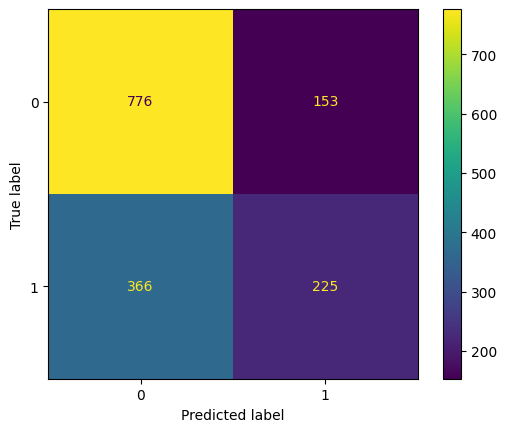

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [49]:
joblib.dump(gbs, 'model-gbs.pkl')

['model-gbs.pkl']

In [50]:
X_train

,Time,venue_code,match_week,opponent_encoded,team_encoded,x0_3-1-4-2,x0_3-2-4-1,x0_3-3-3-1,x0_3-4-1-2,x0_3-4-3,...,x0_4-2-4-0,x0_4-3-1-2,x0_4-3-2-1,x0_4-3-3,x0_4-4-1-1,x0_4-4-2,x0_4-5-1,x0_5-3-2,x0_5-4-1,Attendance
0,20,0,1,5,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.067260
1,15,1,2,14,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252019
2,17,0,3,9,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113055
3,15,1,4,28,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239145
4,16,0,5,17,7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,15,0,35,1,21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169095
6076,14,1,36,32,21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.705713
6077,19,0,21,14,21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030383
6078,14,0,37,33,21,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.403361
